<h1>Page Rank and Personalized Page Rank</h1>

In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



In [2]:
create_transition_matrix = function (g){

    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  
    z = matrix(rowSums(adj))
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    return(transition_matrix)
}

In [3]:
random_walk = function (args){
           
    v = args$start_node
    pg_rank_vec <- args$page_rank_vector
    walk <- c(v)
    
    for(i in 1:args$num_steps){
        
        #fprintf('Step %d: %d\n', i, v)
        PMF = args$transition_matrix[v, ]
        
        teleport_event <- sample(c(0,1), 1, replace = TRUE, prob = c(1-args$teleport_prob, args$teleport_prob)) 
        
        if(!teleport_event)
            v <- sample(1:vcount(args$g), 1, prob = PMF) 
        else
            v <- sample(1:vcount(args$g), 1, prob = args$teleport_pmf) 

        if(!args$steady_state){
            if(v %in% walk)
                break
            else
                pg_rank_vec[v] <- pg_rank_vec[v] + 1
        }
        
        walk <- c(walk, v)

        
        
    }
    
    if(args$steady_state)
        pg_rank_vec[v] <- pg_rank_vec[v] + 1
    
    return(pg_rank_vec)
}

<h2>3a</h2>

Connected:  TRUE


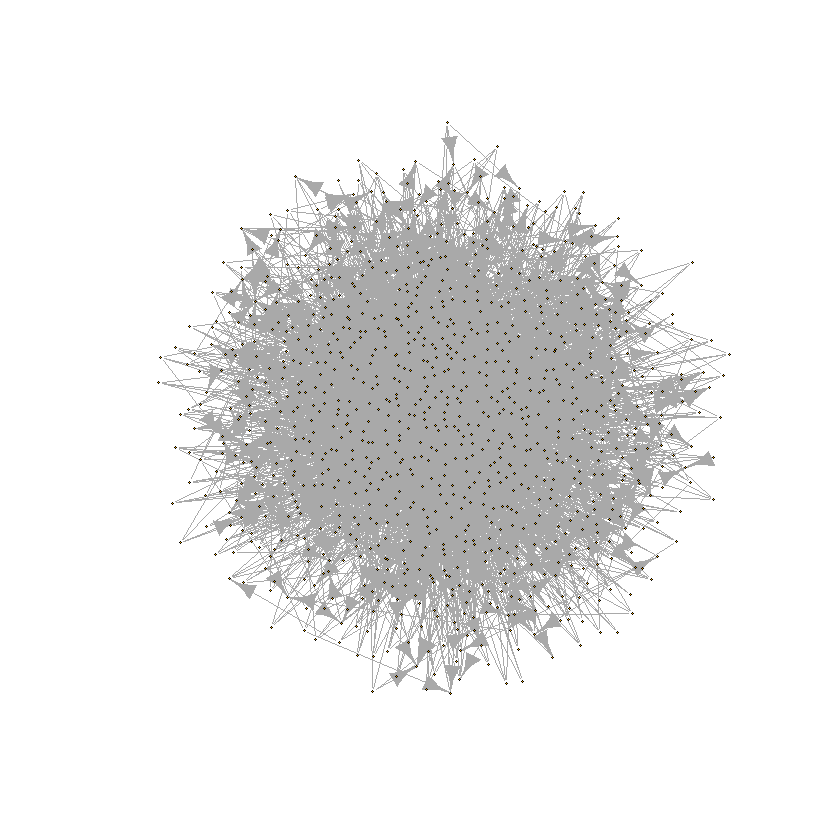

In [4]:
n = 1000
graph <- barabasi.game(n = n, m = 4, directed = TRUE)
writeLines(paste("Connected: ", is.connected(graph)))
plot(graph, vertex.size=1, vertex.label=NA)

   [1] 0 1 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [75] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [149] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [186] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [223] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [260] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [297] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [334] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [371] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [408] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [445] 4 4 4 4 4 4 4 4 4 4 4

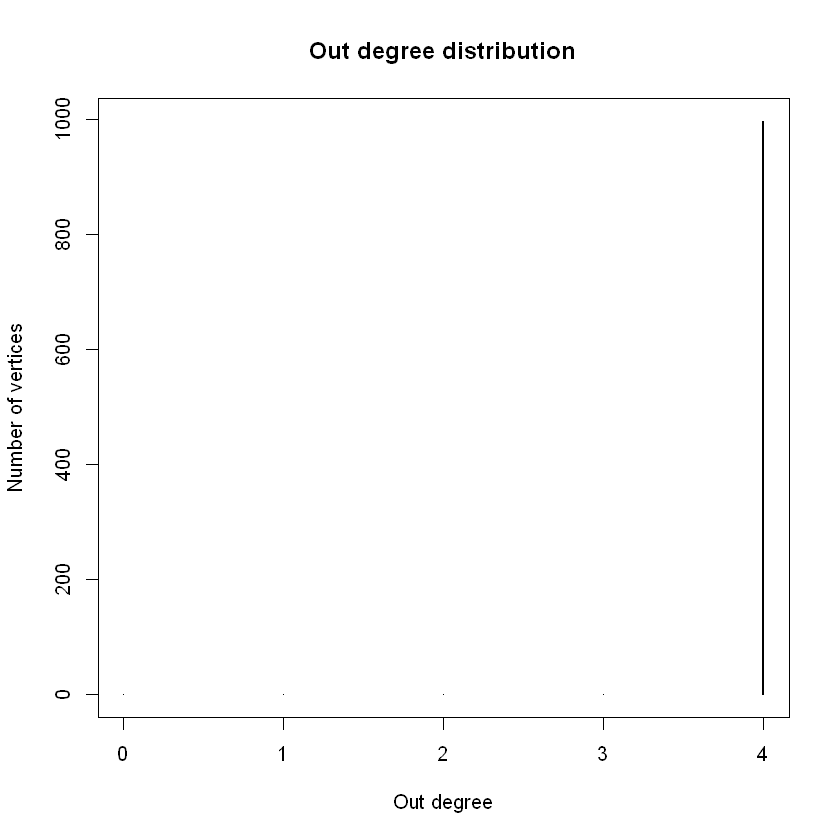

In [8]:
out_degrees <- degree(graph, v = V(graph), mode = c("out"))
print(out_degrees)
plot(table(out_degrees), xlab = "Out degree", ylab = "Number of vertices", main = "Out degree distribution")

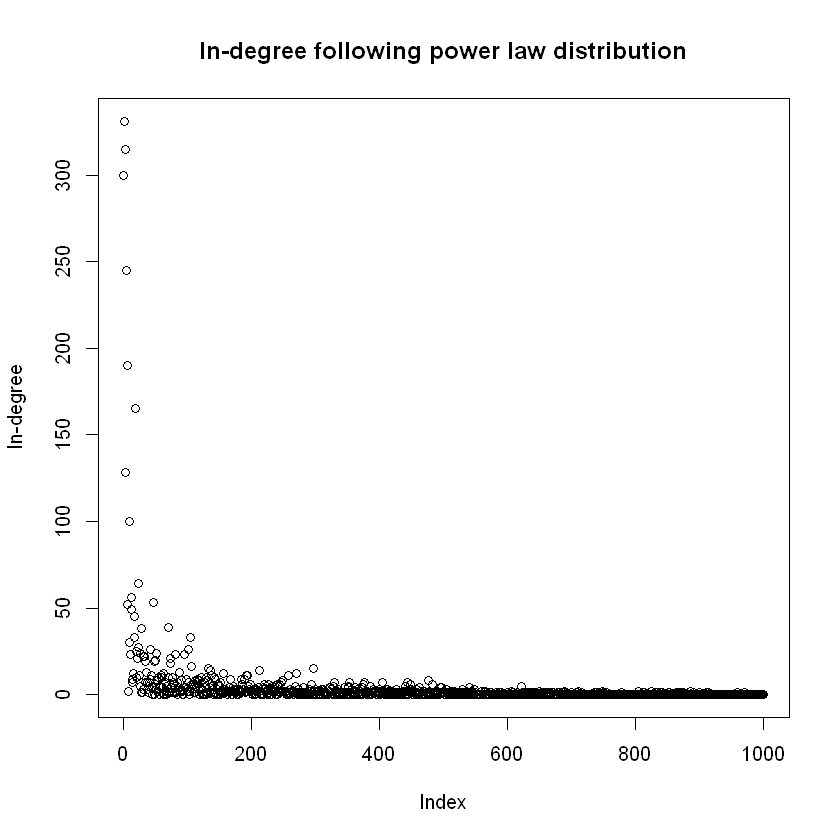

In [8]:
in_degree <- degree(graph, v = V(graph), mode = c("in"))
plot(in_degree, main = "In-degree following power law distribution", ylab = "In-degree")

In [18]:
page_rank = function(args){
    
    for(i in 1:args$iters){
    args$start_node <- sample(1:n, 1)
    args$page_rank_vector <- random_walk(args)
}

    pdf <- args$page_rank_vector / sum(args$page_rank_vector)

    plot(c(pdf), xlab = "Vertex Number", ylab = "Probability of a vertex compared to other vertices", main = args$plot_title)
    #Answers "What is the probability of a randomly chosen vertex in a random walk is Vertex X?"
    #Many random walks have vertices traversed as 1,1,1,2,2,3 -> P(1) = 3/6, P(2) = 2/6, P(3) = 1/6
    
    
    random_walk_prob <- c(args$page_rank_vector/args$iters)
    plot(random_walk_prob, xlab = "Vertex Number", ylab = "Probability of vertex in a random walk",
         main = args$plot_title)
    #Answers "What is the probability that a randomly chosen random walk contains Vertex X?"
    #Random walk 1 is 1,2,3 ; Random Walk 2 is 1,2 ; Random Walk 3 is 1 -> 
    #P(1) = 1 (present in all random walks) ; P(2) = 2/3 ; P(3) = 1/3
    
    plot(args$in_degree, random_walk_prob, xlab = "In degree ", ylab = "Random Walk Probability",
         ylim = c(0, 0.5), xlim = c(0, 300))
    return(pdf)
    
}

In [6]:
transition_matrix <- create_transition_matrix(graph)

<h2>Question 3a - Page Rank considering all nodes</h2>

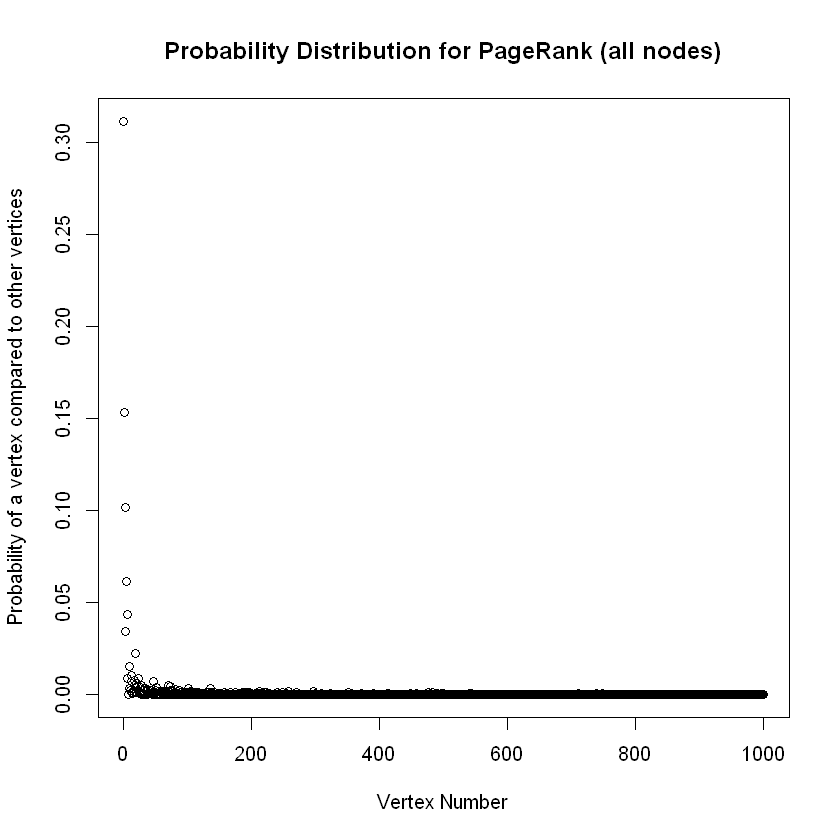

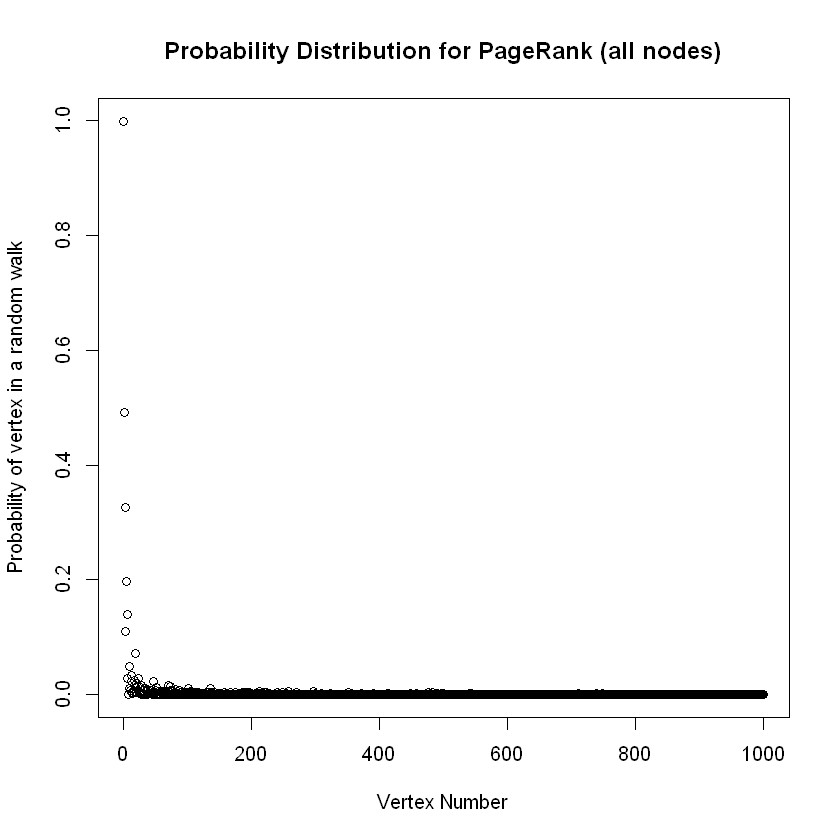

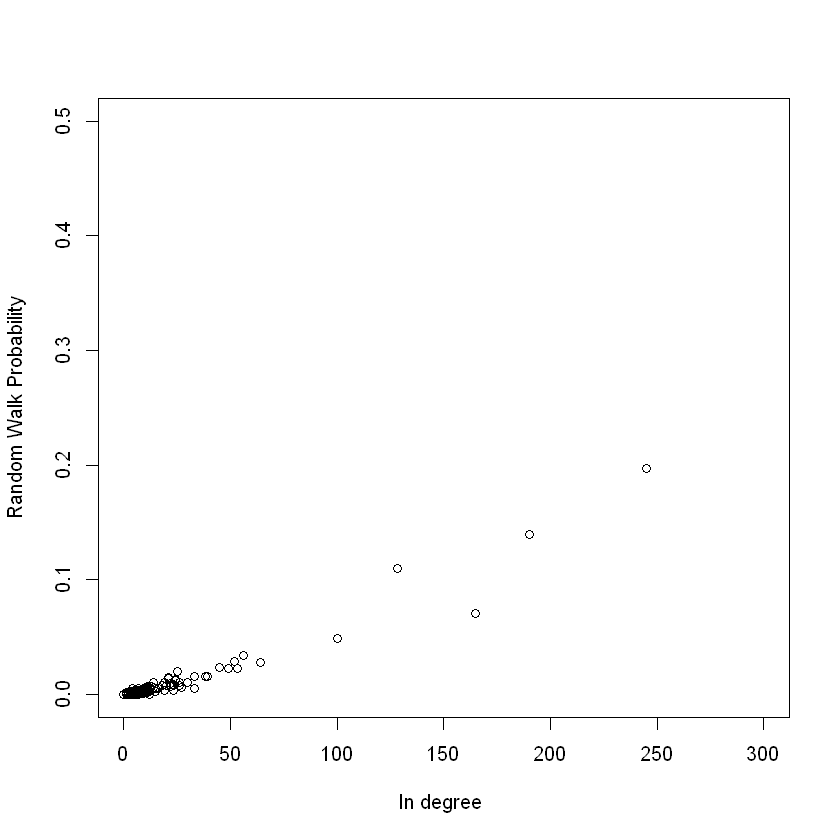

In [19]:
pagerank_scores <- rep(0, n)
iterations <- 1000

args <- list(g = graph, num_steps = 10, steady_state = FALSE, teleport_prob = 0, iters = iterations,
             in_degree = in_degree, teleport_pmf = NULL, page_rank_vector = pagerank_scores, 
             transition_matrix = transition_matrix, plot_title = "Probability Distribution for PageRank (all nodes)")

page_rank_scores <- page_rank(args)

<h2>Question 3b - Page Rank with all nodes - With teleportation</h2>

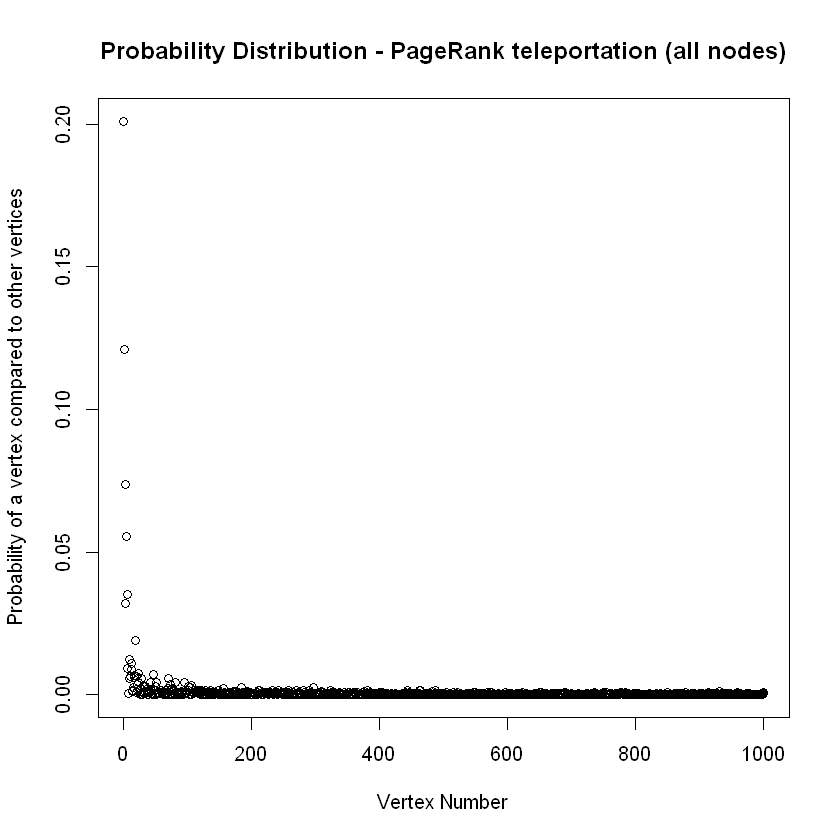

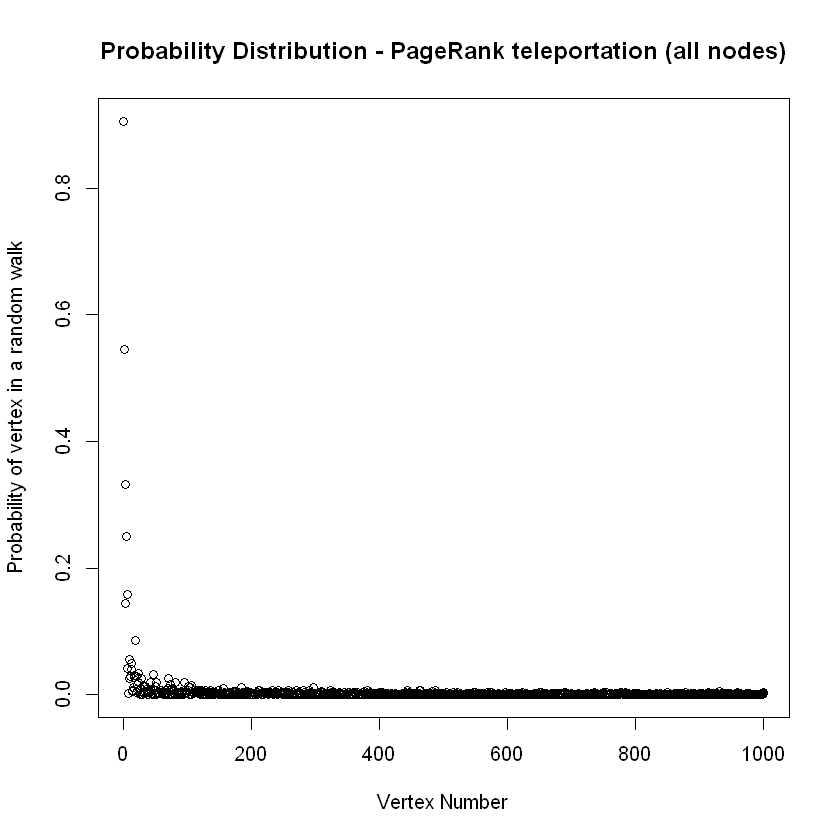

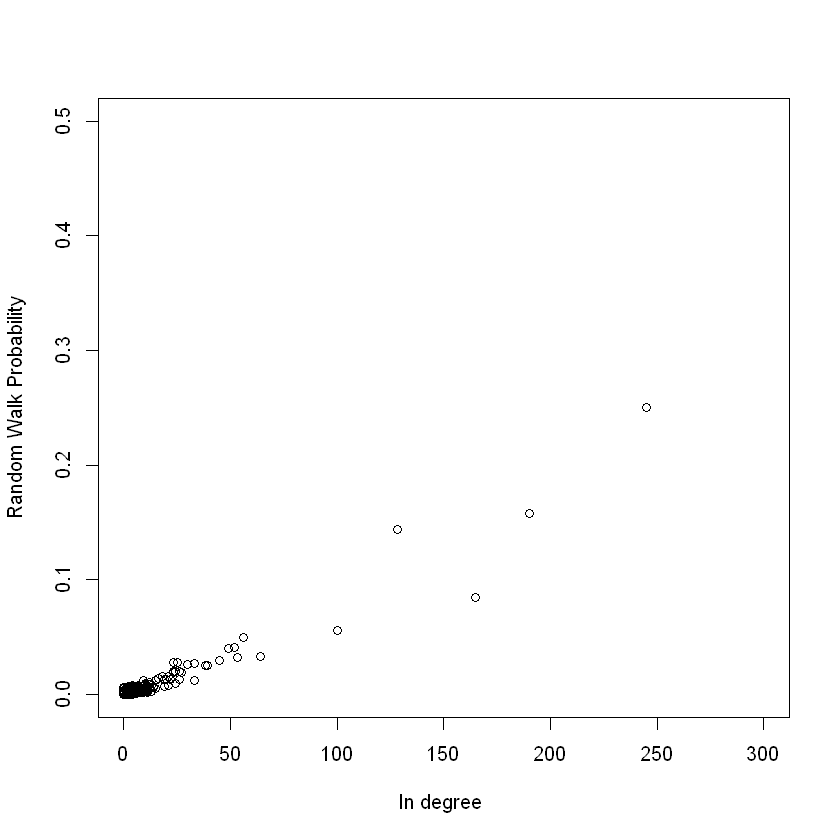

In [20]:
args$pagerank_vector <- rep(0, n)
args$teleport_prob <- 0.15
args$plot_title <- "Probability Distribution - PageRank teleportation (all nodes)"
page_rank_scores <- page_rank(args)

<h2>Question 4a - Personalized Page Rank with all nodes - With teleportation</h2>

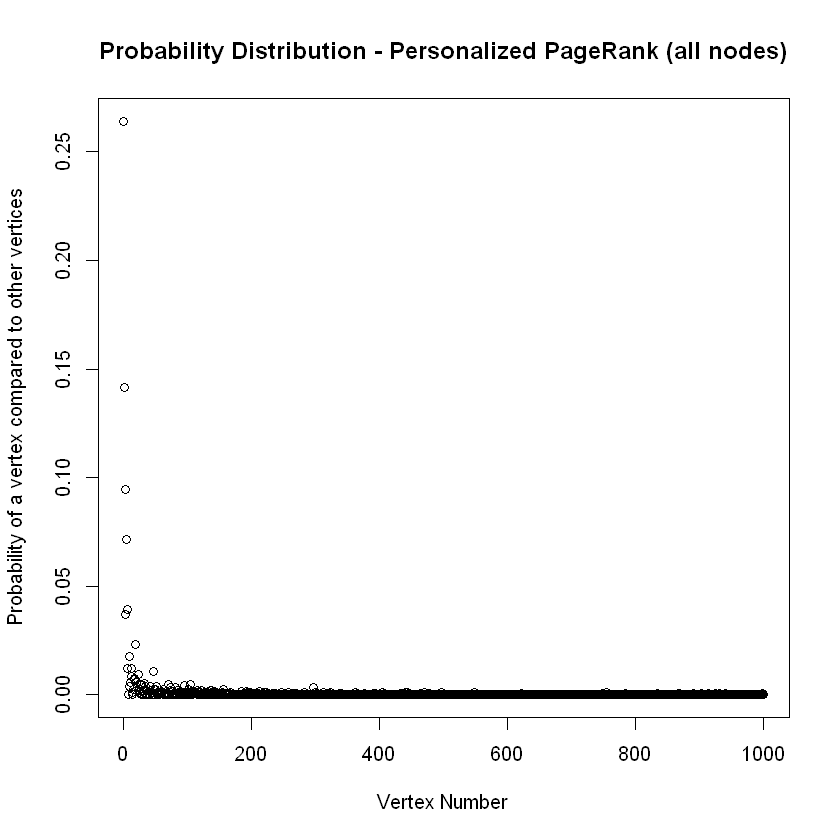

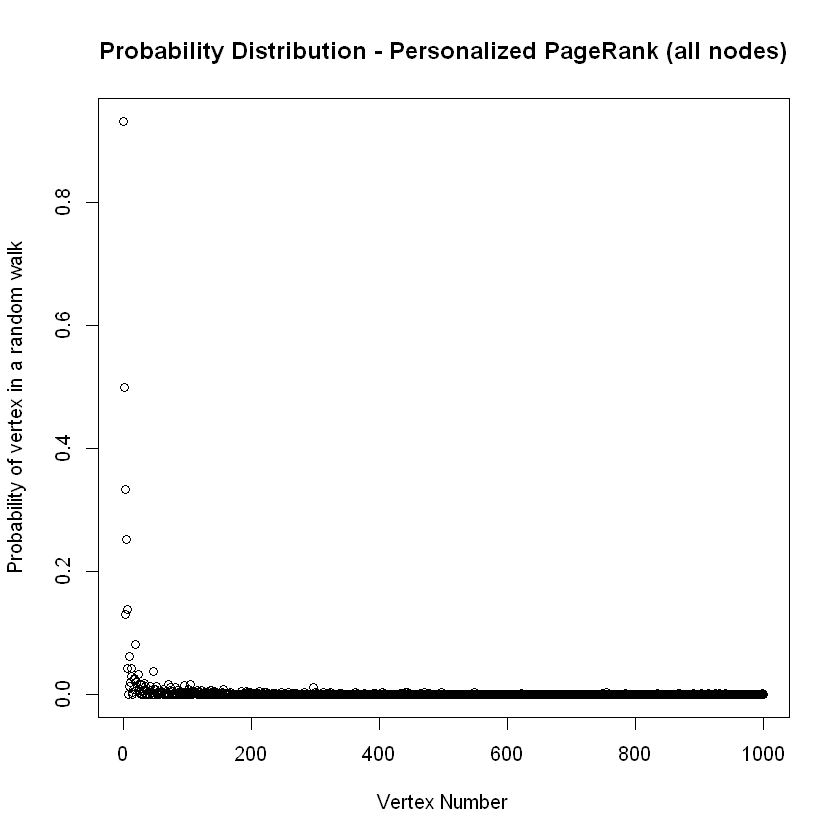

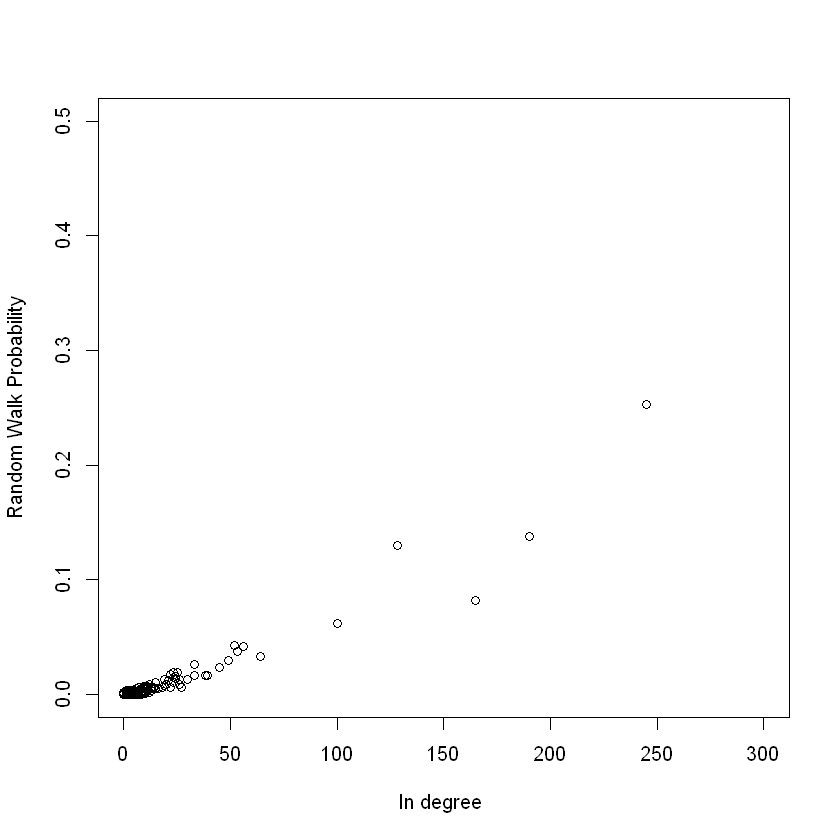

In [21]:
args$pagerank_vector <- rep(0, n)
args$teleport_pmf <- page_rank_scores
args$plot_title <- "Probability Distribution - Personalized PageRank (all nodes)"
personalized_page_rank_scores <- page_rank(args)

<h2>Question 4b - Personalized Page Rank with Median teleportation with all nodes</h2>

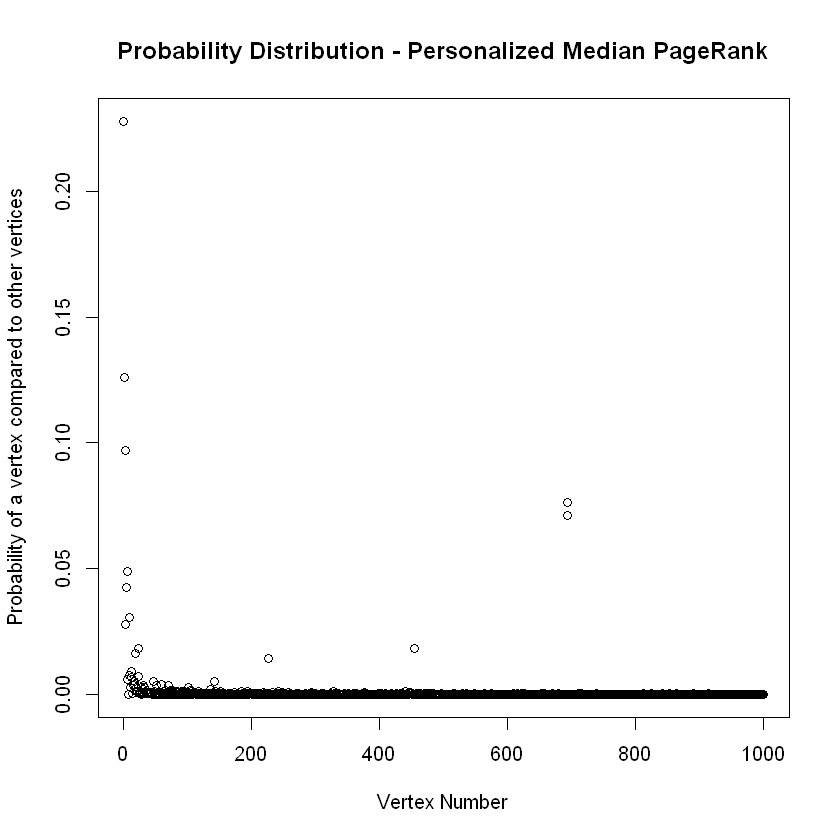

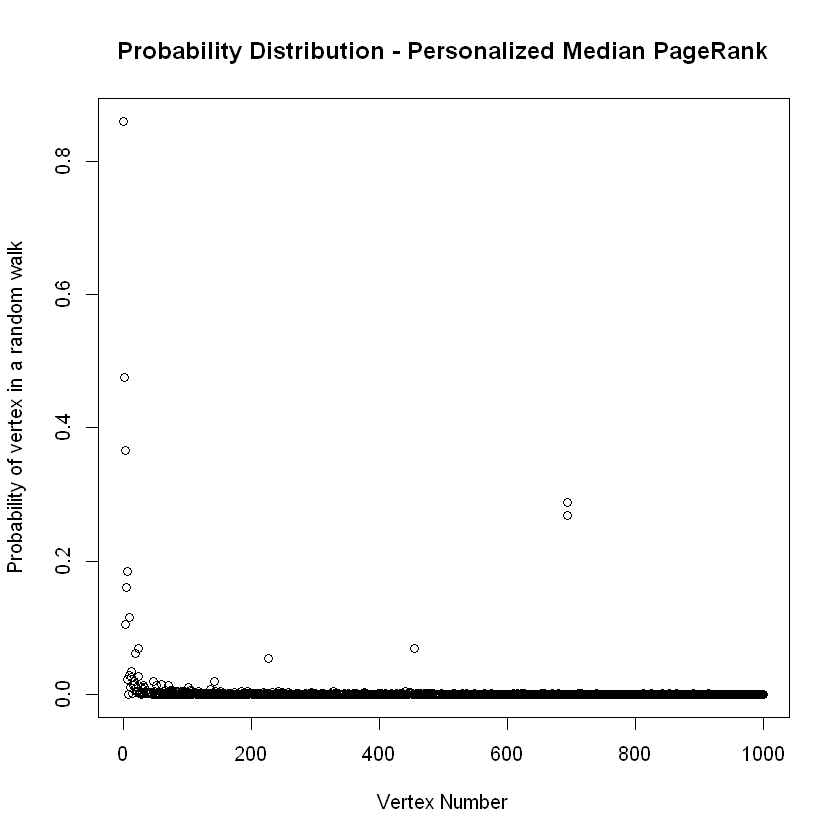

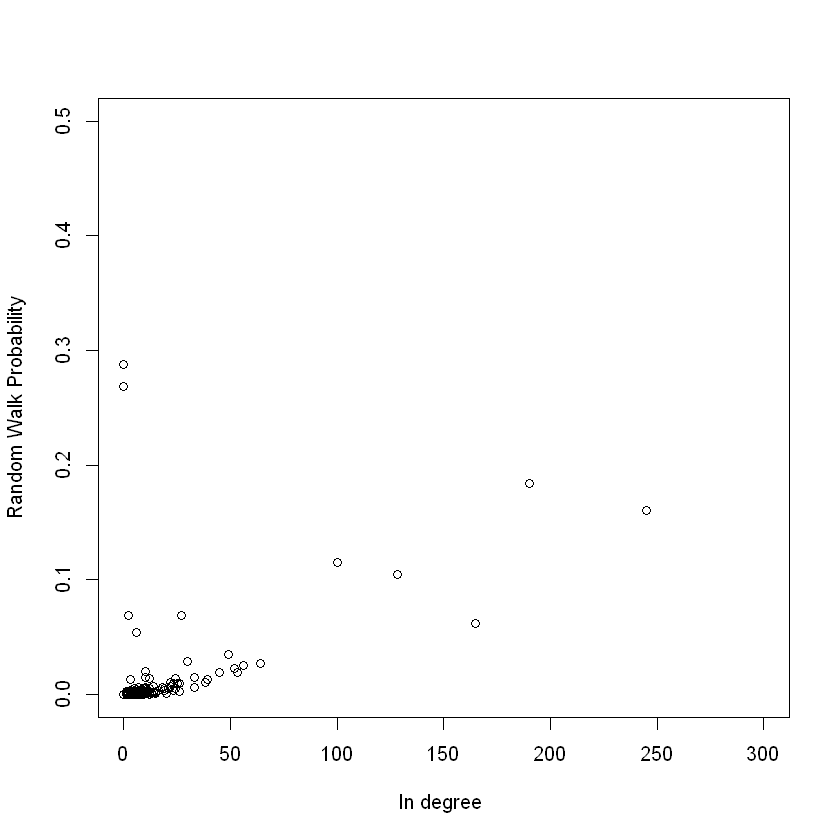

In [22]:
pagerank_pmf_ordered <- order(page_rank_scores)
median1 <- pagerank_pmf_ordered[n/2]
median2 <- pagerank_pmf_ordered[n/2 + 1]

median_pagerank_pmf <- rep(0, n)

median_pagerank_pmf[median1] <- 0.5
median_pagerank_pmf[median2] <- 0.5

args$pagerank_vector <- rep(0, n)
args$teleport_pmf <- median_pagerank_pmf
args$plot_title <- "Probability Distribution - Personalized Median PageRank"

personalized_page_rank_scores <- page_rank(args)

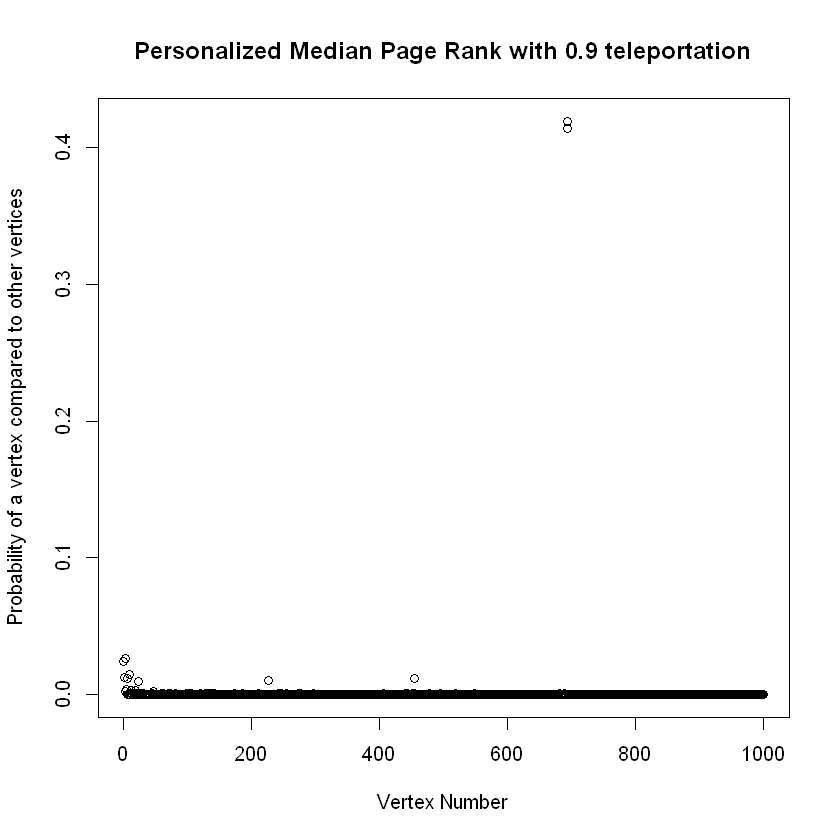

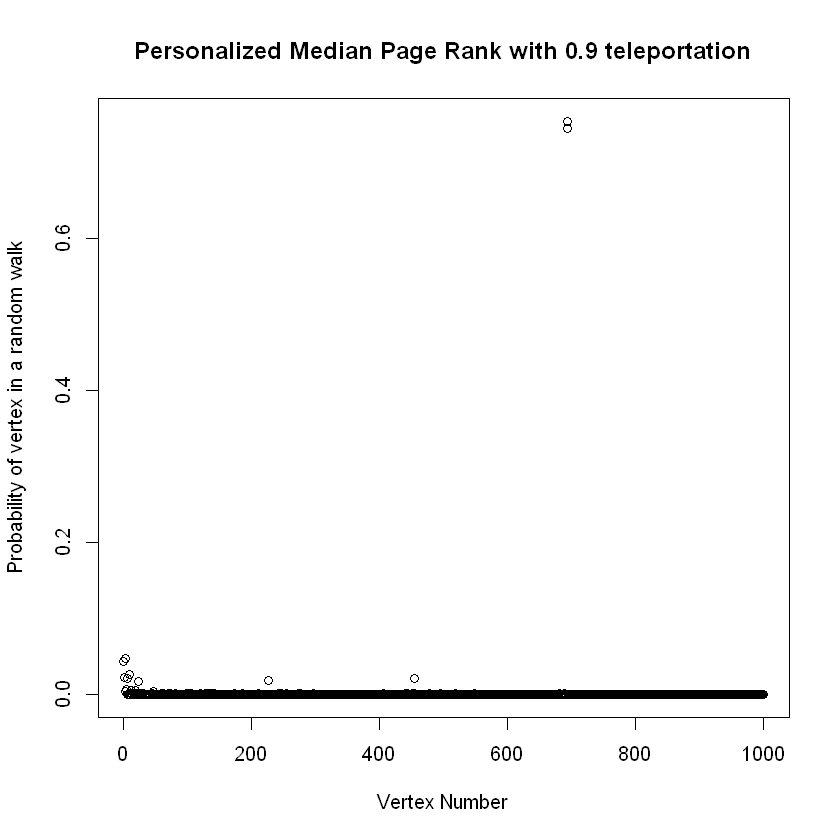

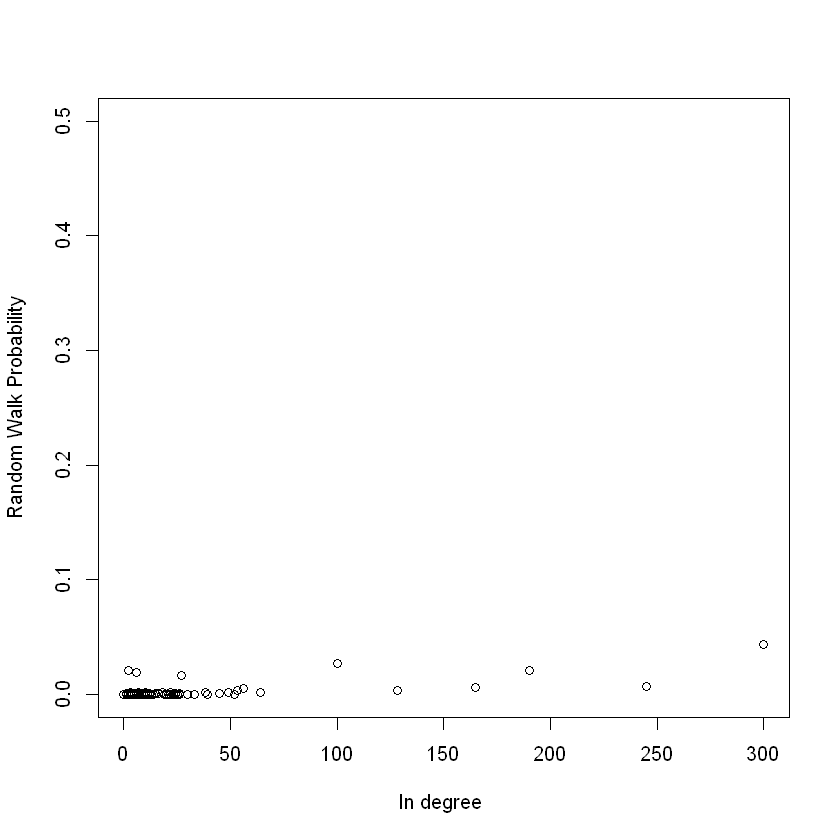

In [23]:
args$pagerank_vector <- rep(0, n)
args$teleport_pmf <- median_pagerank_pmf
args$teleport_prob <- 0.9
args$plot_title <- "Personalized Median Page Rank with 0.9 teleportation"
personalized_page_rank_scores <- page_rank(args)

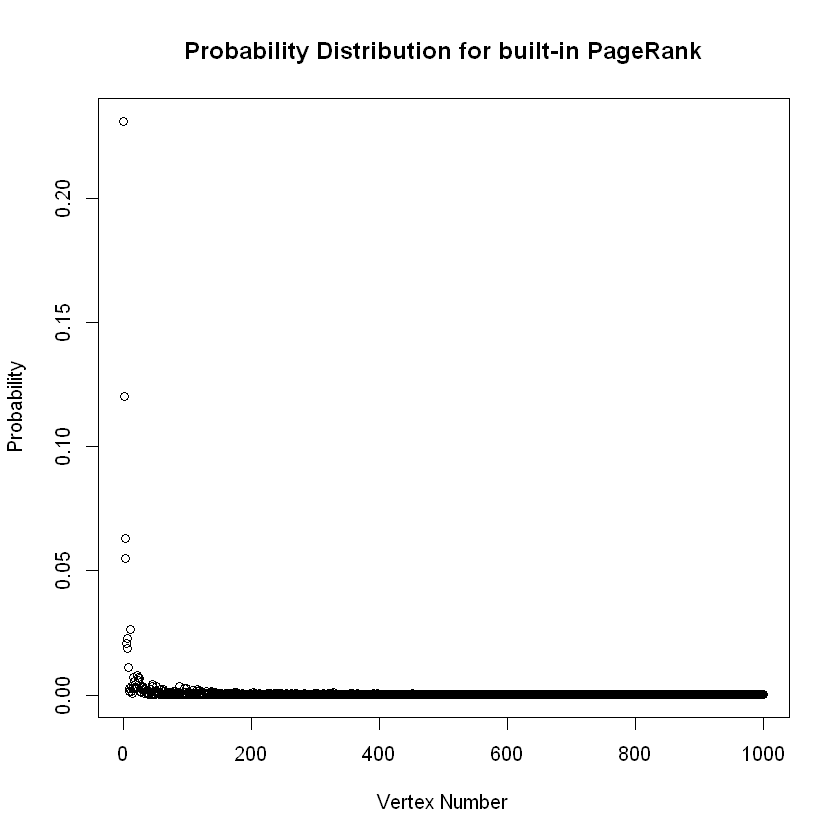

In [44]:
c <- page_rank(graph, vids = V(graph), damping = 1)
plot(c$vector, xlab = "Vertex Number", ylab = "Probability", main = "Probability Distribution for built-in PageRank")